In [2]:
import pygrib
import xarray as xr

In [3]:
ds = xr.open_dataset("./CovidData/CAMS.grib", engine="cfgrib")

In [4]:
ds

<xarray.Dataset>
Dimensions:        (latitude: 10, longitude: 12, time: 912)
Coordinates:
    number         int32 ...
  * time           (time) datetime64[ns] 2019-01-01T15:00:00 ... 2021-06-30T1...
    step           timedelta64[ns] ...
    isobaricInhPa  float64 ...
  * latitude       (latitude) float64 41.55 40.8 40.05 39.3 ... 36.3 35.55 34.8
  * longitude      (longitude) float64 19.37 20.12 20.87 ... 26.12 26.87 27.62
    valid_time     (time) datetime64[ns] ...
    surface        float64 ...
Data variables:
    co             (time, latitude, longitude) float32 ...
    hcho           (time, latitude, longitude) float32 ...
    no2            (time, latitude, longitude) float32 ...
    no             (time, latitude, longitude) float32 ...
    q              (time, latitude, longitude) float32 ...
    pm10           (time, latitude, longitude) float32 ...
    pm1            (time, latitude, longitude) float32 ...
    pm2p5          (time, latitude, longitude) float32 ...
Attributes:
    GRIB_edition:            1
    GRIB_centre:             ecmf
    GRIB_centreDescription:  European Centre for Medium-Range Weather Forecasts
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             European Centre for Medium-Range Weather Forecasts
    history:                 2022-04-04T10:44 GRIB to CDM+CF via cfgrib-0.9.1...

In [49]:
import cartopy.io.shapereader as shpreader
import shapely.vectorized
import pandas as pd
import numpy as np

prefecture = 'C:\Programming\Snap\s5p\shp\prefecture.shp'
reader = shpreader.Reader(prefecture)
records = list(reader.records())

#pd.DataFrame([entry.attributes for entry in records])


In [50]:
from itertools import product, cycle

points = list(product(ds.latitude.values, ds.longitude.values))
x = [i for j, i in points]
y = [j for j, i in points]

In [7]:
#From the above cell
name_temp='NAME_ENG'
NAME_ATTR = name_temp

#x has latitude , y has longitude
masked_data=None
mask_array=None
totalData=[]
for index, region in enumerate(records):
    mask = shapely.vectorized.contains(region.geometry, x, y).reshape(
        (ds.latitude.shape[0], ds.longitude.shape[0]))
    

    if np.any(mask):
        print("Processing {region}".format(region=region.attributes[NAME_ATTR]))
        mask_array = xr.DataArray(mask, dims=('latitude', 'longitude'),
                                      coords={'longitude': ds.longitude, 'latitude': ds.latitude})
        #print(mask_array)
        
        #masked_data = ds.mean(dim='time').where(mask_array, drop=True)
        masked_data = ds.where(mask_array,drop=True)
        totalData.append((region,masked_data))
    else:
        print("{region} does not intersect AOI".format(region=region.attributes[NAME_ATTR]))

Processing N. PIERIAS
N. DYTIKIS ATTIKIS does not intersect AOI
Processing N. IOANNINON
Processing N. PELLAS
N. EVRYTANIAS does not intersect AOI
Processing N. FOKIDAS
Processing N. ETOLOAKARNANIAS
Processing N. LARISAS
Processing N. LAKONIAS
N. IRAKLIOU does not intersect AOI
Processing N. EVROU
N. SAMOU does not intersect AOI
N. PIREOS KE NISON does not intersect AOI
Processing N. CHALKIDIKIS
N. SERRON does not intersect AOI
N. KOZANIS does not intersect AOI
N. IMATHIAS does not intersect AOI
N. FTHIOTIDAS does not intersect AOI
Processing N. CHIOU
N. ACHAIAS does not intersect AOI
Processing N. FLORINAS
Processing N. PREVEZAS
Processing N. EVVIAS
Processing N. GREVENON
N. ATHINON does not intersect AOI
Processing N. ANATOLIKIS ATTIKIS
N. KEFALLONIAS does not intersect AOI
N. RODOPIS does not intersect AOI
Processing N. KORINTHOU
N. CHANION does not intersect AOI
Processing N. LESVOU
Processing N. ARKADIAS
N. KASTORIAS does not intersect AOI
Processing N. ZAKYNTHOU
N. DRAMAS does not

## Measurement Depiction

In [9]:
import matplotlib.pyplot as plt
#import descartes
import geopandas as gpd
from shapely.geometry import Point, Polygon
%matplotlib inline

In [10]:
shpFile = gpd.read_file('C:\Programming\Snap\s5p\shp\prefecture.shp')

<AxesSubplot:>

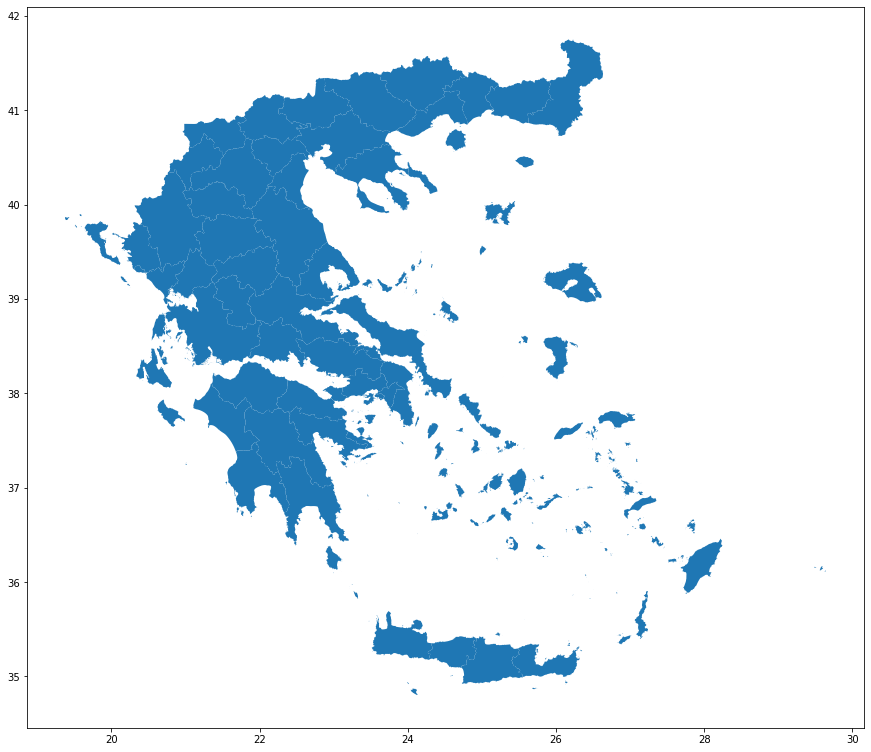

In [11]:
fig,ax = plt.subplots(figsize=(15,15))
shpFile.plot(ax=ax)

In [43]:
points = list(product(ds.longitude.values, ds.latitude.values))

In [44]:
geometry = [Point(xy) for xy in zip(ds.longitude.values,ds.latitude.values)]
geometry[:3]
crs={'init':'epsg:4326'}
df = pd.DataFrame()

In [45]:
#geometry = [Point(xy) for (x,y) in points] 
geom =[]
for (x,y) in points:
    geom.append(Point(x,y))

In [46]:
geo_df = gpd.GeoDataFrame(df,crs=crs,geometry=geom)

C:\Users\razkey\Anaconda3\envs\s5p\lib\site-packages\pyproj\crs\crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


In [ ]:
geom

<AxesSubplot:>

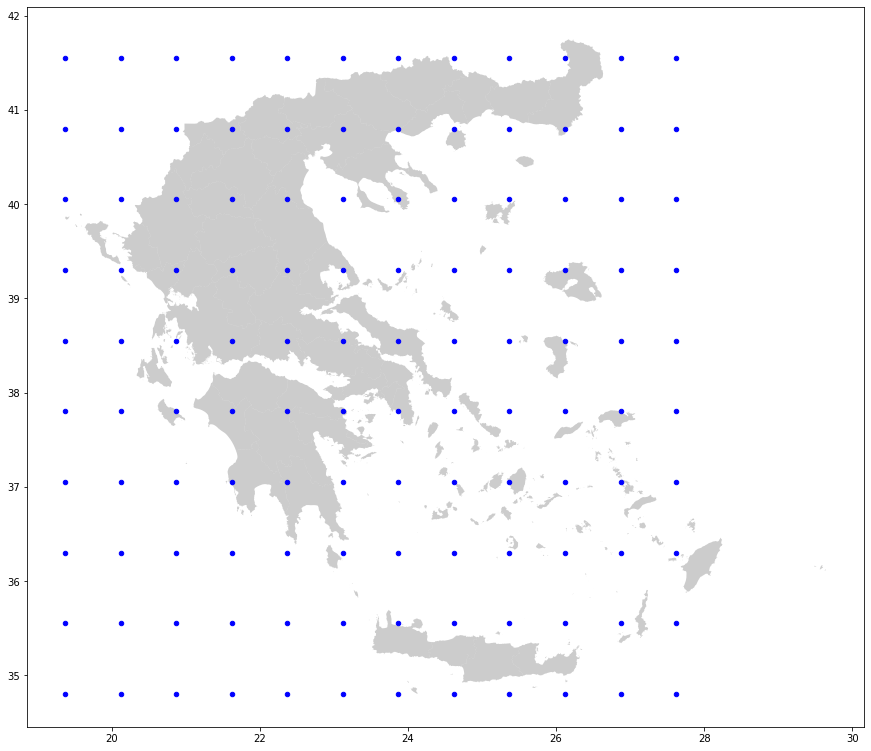

In [47]:
fig,ax = plt.subplots(figsize=(15,15))
shpFile.plot(ax=ax,alpha=0.4,color='grey')
geo_df.plot(ax=ax,markersize=20,color='blue',marker='o')
